In [98]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, precision_score, recall_score, f1_score
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
import sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
lending_club_df = pd.read_csv("./data/final_lending_club.csv")

In [4]:
lending_club_df.head()

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,28000.0,28000.0,7.62,872.52,5,325000.0,945,18.55,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,27600.0,27600.0,19.97,730.78,6,73000.0,802,23.13,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,24000.0,24000.0,13.53,814.80,10,100000.0,493,22.18,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,8000.0,8000.0,10.99,261.88,2,33000.0,800,15.75,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,11500.0,11500.0,22.90,323.54,4,32760.0,937,27.06,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
len([i for i in lending_club_df.columns]) # should be 150 (including the repaid column)

150

### Data Model
``` 'loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'zip_code',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'il_util',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'month',
 'term_ 36 months',
 'term_ 60 months',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'addr_state_AK',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_IA',
 'addr_state_ID',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_state_MO',
 'addr_state_MS',
 'addr_state_MT',
 'addr_state_NC',
 'addr_state_ND',
 'addr_state_NE',
 'addr_state_NH',
 'addr_state_NJ',
 'addr_state_NM',
 'addr_state_NV',
 'addr_state_NY',
 'addr_state_OH',
 'addr_state_OK',
 'addr_state_OR',
 'addr_state_PA',
 'addr_state_RI',
 'addr_state_SC',
 'addr_state_SD',
 'addr_state_TN',
 'addr_state_TX',
 'addr_state_UT',
 'addr_state_VA',
 'addr_state_VT',
 'addr_state_WA',
 'addr_state_WI',
 'addr_state_WV',
 'addr_state_WY']'```

### Make sure training DF is in the same order as the data model

In [108]:
lending_club_df_training = lending_club_df[['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'zip_code',
 'dti',
                                            'repaid',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'il_util',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'month',
 'term_ 36 months',
 'term_ 60 months',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'addr_state_AK',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_IA',
 'addr_state_ID',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_state_MO',
 'addr_state_MS',
 'addr_state_MT',
 'addr_state_NC',
 'addr_state_ND',
 'addr_state_NE',
 'addr_state_NH',
 'addr_state_NJ',
 'addr_state_NM',
 'addr_state_NV',
 'addr_state_NY',
 'addr_state_OH',
 'addr_state_OK',
 'addr_state_OR',
 'addr_state_PA',
 'addr_state_RI',
 'addr_state_SC',
 'addr_state_SD',
 'addr_state_TN',
 'addr_state_TX',
 'addr_state_UT',
 'addr_state_VA',
 'addr_state_VT',
 'addr_state_WA',
 'addr_state_WI',
 'addr_state_WV',
 'addr_state_WY']]

In [109]:
y_col = lending_club_df_training.repaid

In [110]:
x_cols = lending_club_df_training.iloc[:,lending_club_df.columns!='repaid'] 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_cols, y_col,test_size=.15)

In [12]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,test_size=.15)

In [13]:
X_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961071 entries, 859384 to 1291576
Columns: 149 entries, loan_amnt to addr_state_WY
dtypes: float64(65), int64(84)
memory usage: 1.1 GB


# Random Forest First

In [112]:
num_trees_rf = 2

In [113]:
rf = RandomForestClassifier(n_estimators=num_trees_rf, n_jobs=-1, verbose = 1) #n_jobs -1 parallelize the tree building

In [114]:
s_rf = time.time()
rf.fit(X_t,y_t)
e_rf = time.time()

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   14.9s finished


In [115]:
print("RF training took {} minutes".format((e_rf-s_rf)/60))

RF training took 0.379330615203 minutes


In [116]:
predictions_rf = rf.predict(X_val)
positive_probability_predictions = rf.predict_proba(X_val)[:,1]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


In [117]:
predictions_rf.sum()

27244

### Initial Accuracy

In [118]:
print("Accuracy of Random Forrest with {} trees was {:.2%}".format(num_trees_rf,accuracy_score(y_val, predictions_rf)))

Accuracy of Random Forrest with 2 trees was 69.32%


### Initial Recall and Precision

In [74]:
print("recall of RF is {:.2%}".format(recall_score(y_val, predictions_rf)))

recall of RF is 50.19%


In [75]:
print("Precision of RF is {:.2%}".format(precision_score(y_val, predictions_rf)))

Precision of RF is 57.67%


### Initial F1

In [84]:
print("F1 score of RF was {:.2%} ".format(f1_score(y_val, predictions_rf)))

F1 score of RF was 53.67% 


# Gradient Boosting

In [77]:
num_gb_trees = 5

In [78]:
gb = GradientBoostingClassifier(n_estimators=num_gb_trees, verbose = 1)

In [79]:
s_gb = time.time()
gb.fit(X_t,y_t)
e_gb  = time.time()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
print("GB training took {}".format((e_gb-s_gb)/60))

In [87]:
predictions_gb = gb.predict(X_val)
positive_probability_predictions_gb = gb.predict_proba(X_val)[:,1]

In [92]:
predictions_gb

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
print("Accuracy of GB with {} trees was {}".format(num_gb_trees,accuracy_score(y_val, predictions_gb)))

Accuracy of GB with 5 trees was 0.669253129404


In [89]:
print("recall of GB is {:.2%}".format(recall_score(y_val, predictions_gb)))

recall of GB is 0.00%


In [83]:
print("Precision of GB is {:.2%}".format(precision_score(y_val, predictions_gb)))

Precision of GB is 0.00%


/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
print("F1 score of GB was {:.2%} ".format(f1_score(y_val, predictions_gb)))

F1 score of GB was 0.00% 


/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Save the models

In [104]:
filename = './models/random_forest_{}-trees.joblib.pkl'.format(num_trees_rf)
_ = joblib.dump(rf, filename, compress=9)

In [ ]:
filename = './models/gradient_boosting_{}-trees.joblib.pkl'.format(num_gb_trees)
_ = joblib.dump(gb, filename, compress=9)

## Find the best threshold

In [28]:
fpr, tpr, thresholds = roc_curve(y_val, positive_probability_predictions)

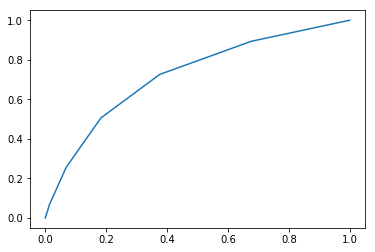

In [29]:
plt.plot(fpr,tpr)

### Adjust threshold
- We want to minimize the number of false positive (people who we think will pay back but don't)


In [49]:
p6_threshold = positive_probability_predictions>.6

In [50]:
accuracy_score(y_val, p6_threshold )

0.7468293229403129

In [51]:
precision_score(y_val,p6_threshold ) # up to 90% precision now

0.75670264965652601

In [52]:
recall_score(y_val, p6_threshold)

0.34412767552707213

In [53]:
f1_score(y_val, p6_threshold)

0.47310165415010064

### Feature importances

In [34]:
lending_club_df.columns[np.argsort(rf.feature_importances_)[::-1]][:20]

Index([u'all_util', u'open_il_24m', u'int_rate', u'dti', u'bc_util',
       u'revol_util', u'zip_code', u'mo_sin_old_rev_tl_op', u'avg_cur_bal',
       u'tot_cur_bal', u'mo_sin_old_il_acct', u'tot_hi_cred_lim', u'revol_bal',
       u'annual_inc', u'installment', u'total_rev_hi_lim', u'total_bc_limit',
       u'total_bal_ex_mort', u'total_il_high_credit_limit', u'total_acc'],
      dtype='object')

In [36]:
rf.feature_importances_

array([  1.60408712e-02,   1.56640838e-02,   2.85551930e-02,
         1.97012650e-02,   1.06018213e-02,   1.98138631e-02,
         2.11859082e-02,   2.59101440e-02,   3.55634199e-03,
         5.92559594e-03,   1.10401854e-02,   5.82696578e-03,
         1.14744845e-02,   2.68872129e-03,   1.99387710e-02,
         2.12906333e-02,   1.76832563e-02,   6.42987489e-04,
         6.45318093e-03,   2.07564022e-04,   5.82979344e-03,
         2.05015376e-02,   2.92745530e-03,   3.42250204e-03,
         9.22301595e-03,   3.34465621e-02,   1.59631279e-02,
         1.20934306e-02,   1.53685819e-02,   7.71974551e-02,
         1.96132993e-02,   1.49756604e-02,   1.21473219e-02,
         2.05868508e-02,   2.14259726e-02,   3.45461829e-04,
         2.79907211e-04,   2.03545834e-02,   2.10237170e-02,
         1.55509473e-02,   1.37576713e-02,   8.73531351e-03,
         1.73456592e-02,   6.46415839e-03,   1.40980063e-02,
         8.39735200e-03,   3.61906860e-03,   9.12968405e-03,
         9.98072398e-03,

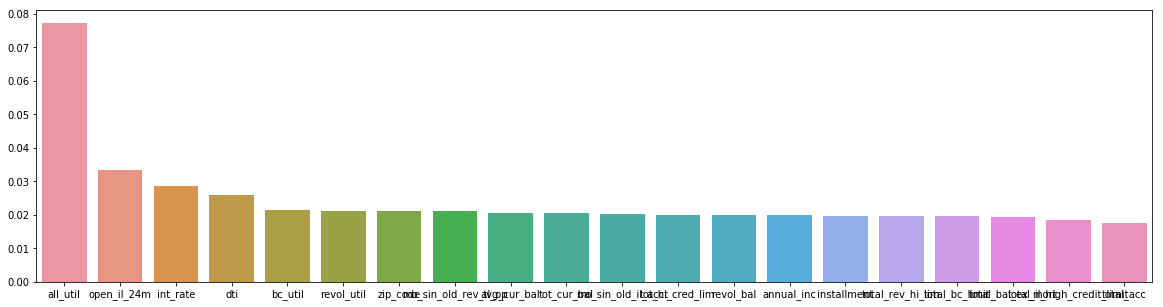

In [44]:
plt.figure(figsize=(20,5))
sns.barplot(lending_club_df.columns[np.argsort(rf.feature_importances_)[::-1]][:20],
            rf.feature_importances_[np.argsort(rf.feature_importances_)[::-1][:20]])